# 전처리
|피쳐||||||||
|---|---|---|---|---|---|---|---|
|유로환율|Date|종가|시가|고가|저가|거래량|변동%|
|DAX|Date|종가|시가|고가|저가|거래량(백 만)|변동%|
|VSTOXX EUR|Date|종가|시가|고가|저가||변동%|
|EUROSTOXX50|Date|종가|시가|고가|저가||변동%|
|CAC|Date|종가|시가|고가|저가|거래량|변동%|
|협의통화|Date|M1|M2|M3||||

In [1]:
import pandas as pd
import numpy as np

In [26]:
df1=pd.read_csv('어쩌면최종데이터.csv')
df2=pd.read_csv('유로환율.csv')

In [28]:
dax_df=pd.read_csv('DAX 과거 데이터.csv')
vstoxx_df=pd.read_csv('STOXX 50 Volatility VSTOXX EUR 과거 데이터.csv')
eurostoxx50_df=pd.read_csv('유로 스톡스 50 과거 데이터.csv')
cac_df=pd.read_csv('프랑스 CAC 과거 데이터.csv')

In [29]:
meuro_df=pd.read_excel('유로지역 통화지표.xlsx')

In [80]:
df2['종가']=df2['종가'].apply(lambda x: x.replace(',','')).astype(float)
df2['시가']=df2['시가'].apply(lambda x: x.replace(',','')).astype(float)
df2['고가']=df2['고가'].apply(lambda x: x.replace(',','')).astype(float)
df2['저가']=df2['저가'].apply(lambda x: x.replace(',','')).astype(float)
df2['거래량']=df2['거래량'].apply(lambda x: str(x).replace('M','') if x!=np.nan else x).astype(float)
df2['변동 %']=df2['변동 %'].apply(lambda x: x.replace('%','')).astype(float)

In [81]:
df2=df2.rename(columns={'종가':'Close','시가':'Open','저가':'Low','고가':'High'})

In [30]:
dax_df.columns=['Date','Dax_종가','Dax_시가','Dax_고가','Dax_저가','Dax_거래량(백 만)','Dax_변동%']
dax_df.Date=pd.to_datetime(dax_df.Date,format='%Y- %m- %d')
dax_df['Dax_종가']=dax_df['Dax_종가'].apply(lambda x: x.replace(',','')).astype(float)
dax_df['Dax_시가']=dax_df['Dax_시가'].apply(lambda x: x.replace(',','')).astype(float)
dax_df['Dax_고가']=dax_df['Dax_고가'].apply(lambda x: x.replace(',','')).astype(float)
dax_df['Dax_저가']=dax_df['Dax_저가'].apply(lambda x: x.replace(',','')).astype(float)
dax_df['Dax_거래량(백 만)']=dax_df['Dax_거래량(백 만)'].apply(lambda x: str(x).replace('M','') if x!=np.nan else x).astype(float)
dax_df['Dax_변동%']=dax_df['Dax_변동%'].apply(lambda x: x.replace('%','')).astype(float)

vstoxx_df=vstoxx_df.drop('거래량',axis=1)
vstoxx_df.columns=['Date','VSTOXX_종가','VSTOXX_시가','VSTOXX_고가','VSTOXX_저가','VSTOXX_변동%']
vstoxx_df.Date=pd.to_datetime(vstoxx_df.Date,format='%Y- %m- %d')
vstoxx_df['VSTOXX_변동%']=vstoxx_df['VSTOXX_변동%'].apply(lambda x: x.replace('%','')).astype(float)

eurostoxx50_df=eurostoxx50_df.drop('거래량',axis=1)
eurostoxx50_df.columns=['Date','EUROSTOXX50_종가','EUROSTOXX50_시가','EUROSTOXX50_고가','EUROSTOXX50_저가','EUROSTOXX50_변동%']
eurostoxx50_df.Date=pd.to_datetime(eurostoxx50_df.Date,format='%Y- %m- %d')
eurostoxx50_df.EUROSTOXX50_종가=eurostoxx50_df.EUROSTOXX50_종가.apply(lambda x: x.replace(',','')).astype(float)
eurostoxx50_df.EUROSTOXX50_시가=eurostoxx50_df.EUROSTOXX50_시가.apply(lambda x: x.replace(',','')).astype(float)
eurostoxx50_df.EUROSTOXX50_고가=eurostoxx50_df.EUROSTOXX50_고가.apply(lambda x: x.replace(',','')).astype(float)
eurostoxx50_df.EUROSTOXX50_저가=eurostoxx50_df.EUROSTOXX50_저가.apply(lambda x: x.replace(',','')).astype(float)
eurostoxx50_df['EUROSTOXX50_변동%']=eurostoxx50_df['EUROSTOXX50_변동%'].apply(lambda x: x.replace('%','')).astype(float)

meuro_df.범례명=pd.to_datetime(meuro_df.범례명,format='%Y-%m')

In [31]:
meuro_df=meuro_df.rename(columns={'범례명':'Date'})

In [32]:
all_df=pd.merge(dax_df,vstoxx_df,how='inner',on='Date')
all_df=pd.merge(all_df,eurostoxx50_df,how='inner',on='Date')

In [33]:
import datetime as dt
all_df['YM']=all_df['Date'].dt.to_period('M').astype(str)
meuro_df['YM']=meuro_df['Date'].dt.to_period('M').astype(str)

In [34]:
all_df=pd.merge(all_df,meuro_df.drop('Date',axis=1),how='left',on='YM')
all_df=all_df.drop(['유로지역(M3)','YM'],axis=1).sort_values(by='Date',ascending=True).reset_index().drop('index',axis=1)

In [35]:
all_df.to_csv('all_df.csv')

In [36]:
print(list(df1))

['Date', '미환율_종가', '미환율_시가', '미환율_고가', '미환율_저가', '미환율_변동%', 'WTI유_종가', 'WTI유_시가', 'WTI유_고가', 'WTI유_저가', 'WTI유_거래량', 'WTI유_변동%', '금_종가', '금_시가', '금_고가', '금_저가', '금_거래량', '금_변동%', 'S&P500_종가', 'S&P500_시가', 'S&P500_고가', 'S&P500_저가', 'S&P500_변동%', '다우존스_종가', '다우존스_시가', '다우존스_고가', '다우존스_저가', '다우존스_거래량', '다우존스_변동%', '상해종합_종가', '상해종합_시가', '상해종합_고가', '상해종합_저가', '상해종합_거래량', '상해종합_변동%', '닛케이_종가', '닛케이_시가', '닛케이_고가', '닛케이_저가', '닛케이_변동%', '코스피_종가', '코스피_시가', '코스피_고가', '코스피_저가', '코스피_거래량', '코스피_변동%', '나스닥_종가', '나스닥_시가', '나스닥_고가', '나스닥_저가', '나스닥_거래량', '나스닥_변동%', 'VIX_종가', 'VIX_시가', 'VIX_고가', 'VIX_저가', 'VIX_거래량', 'VIX_변동%', '시가총액_전체', '시가총액_외국인보유', '시가총액_비율', '주식수_전체', '주식수_외국인보유', '주식수_비율', 'CD금리(91일)', '국고채(3년)', '한국정책금리', '미국정책금리', 'return', 'log_return', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'sma_5', 'std_5', 'sma_10', 'std_10', 'sma_20', 'std_20', 'sma_60', 'std_60', 'bb_upper', 'bb_lower', 'bb_width', 'volatility_20', 'momentum_5', 'momentum_10', 'momentum_20', 'rsi_14', 'macd', 'macd_si

In [37]:
df2=df2.rename(columns={'날짜':'Date'})

In [38]:
df1_a=df1[['Date', 'WTI유_종가', 'WTI유_시가', 'WTI유_고가', 'WTI유_저가', 'WTI유_거래량', 'WTI유_변동%', '금_종가', '금_시가', '금_고가', '금_저가', '금_거래량', '금_변동%', '코스피_종가', '코스피_시가', '코스피_고가', '코스피_저가', '코스피_거래량', '코스피_변동%', '나스닥_종가', '나스닥_시가', '나스닥_고가', '나스닥_저가', '나스닥_거래량', '나스닥_변동%', 'VIX_종가', 'VIX_시가', 'VIX_고가', 'VIX_저가', 'VIX_거래량', 'VIX_변동%', '시가총액_전체', '시가총액_외국인보유', '시가총액_비율', '주식수_전체', '주식수_외국인보유', '주식수_비율', 'CD금리(91일)', '국고채(3년)', '한국정책금리', '미국정책금리', '기준년월', '한국(M1)조원', '한국(M1)변동%', '한국(M2)조원', '한국(M2)변동%', '미국(M1)십억달러', '미국(M2)십억달러', '소비자심리지수', '생산자물가지수', '산업생산지수', '외환보유액(억달러)', '경상수지', '미국소비자물가지수', '비트코인_검색량', '일본엔_검색량', '유로(EUR)_검색량', 'S&P 500_검색량', '코스피_검색량', '일본EPU', '중국EPU', '한국EPU', '미국EPU', '글로벌EPU_명목GDP기준', '글로벌EPU_PPP기준']]

In [39]:
print(list(df1_a))

['Date', 'WTI유_종가', 'WTI유_시가', 'WTI유_고가', 'WTI유_저가', 'WTI유_거래량', 'WTI유_변동%', '금_종가', '금_시가', '금_고가', '금_저가', '금_거래량', '금_변동%', '코스피_종가', '코스피_시가', '코스피_고가', '코스피_저가', '코스피_거래량', '코스피_변동%', '나스닥_종가', '나스닥_시가', '나스닥_고가', '나스닥_저가', '나스닥_거래량', '나스닥_변동%', 'VIX_종가', 'VIX_시가', 'VIX_고가', 'VIX_저가', 'VIX_거래량', 'VIX_변동%', '시가총액_전체', '시가총액_외국인보유', '시가총액_비율', '주식수_전체', '주식수_외국인보유', '주식수_비율', 'CD금리(91일)', '국고채(3년)', '한국정책금리', '미국정책금리', '기준년월', '한국(M1)조원', '한국(M1)변동%', '한국(M2)조원', '한국(M2)변동%', '미국(M1)십억달러', '미국(M2)십억달러', '소비자심리지수', '생산자물가지수', '산업생산지수', '외환보유액(억달러)', '경상수지', '미국소비자물가지수', '비트코인_검색량', '일본엔_검색량', '유로(EUR)_검색량', 'S&P 500_검색량', '코스피_검색량', '일본EPU', '중국EPU', '한국EPU', '미국EPU', '글로벌EPU_명목GDP기준', '글로벌EPU_PPP기준']


In [41]:
df1_a['Date']=pd.to_datetime(df1_a['Date'])
df2['Date']=pd.to_datetime(df2['Date'])
all_df['Date']=pd.to_datetime(all_df['Date'])

C:\Users\campus4D044\AppData\Local\Temp\ipykernel_22384\432297386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_a['Date']=pd.to_datetime(df1_a['Date'])


In [47]:
df_base=pd.merge(df1_a,df2,how='right',on='Date')
df_base=pd.merge(df_base,all_df,how='right',on='Date')

In [ ]:
print(list(df_base))

In [48]:
df_base=df_base.replace([np.inf,-np.inf],np.nan)
df_base=df_base.loc[:,df_base.isnull().mean()<0.05]

In [49]:
df_base

,Date,WTI유_종가,WTI유_시가,WTI유_고가,WTI유_저가,WTI유_거래량,WTI유_변동%,금_종가,금_시가,금_고가,...,VSTOXX_고가,VSTOXX_저가,VSTOXX_변동%,EUROSTOXX50_종가,EUROSTOXX50_시가,EUROSTOXX50_고가,EUROSTOXX50_저가,EUROSTOXX50_변동%,유로지역(M1),유로지역(M2)
0,2012-12-28,90.80,91.15,91.49,90.32,131370.0,-0.08,1655.9,1664.0,1667.0,...,21.35,17.79,17.11,2626.85,2660.89,2664.37,2626.41,-1.24,5102595,8998474
1,2013-01-02,93.12,91.78,93.87,91.56,203870.0,1.42,1688.8,1676.4,1695.4,...,19.09,17.49,-14.00,2711.25,2659.79,2711.25,2659.79,2.86,5105555,9014275
2,2013-01-03,92.92,92.91,93.30,92.49,189810.0,-0.21,1674.6,1686.2,1690.5,...,18.28,17.51,-4.47,2701.22,2705.80,2705.80,2689.30,-0.37,5105555,9014275
3,2013-01-04,93.09,92.86,93.21,91.52,210750.0,0.18,1648.9,1663.8,1664.5,...,17.87,16.05,-8.38,2709.35,2696.94,2711.02,2690.11,0.30,5105555,9014275
4,2013-01-07,93.19,93.21,93.35,92.42,166290.0,0.11,1646.3,1656.3,1663.0,...,17.03,16.43,4.67,2695.56,2712.25,2714.18,2691.04,-0.51,5105555,9014275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3094,2025-03-24,69.11,68.35,69.33,67.95,247020.0,1.22,3044.0,3054.7,3066.4,...,20.10,18.54,-5.49,5415.79,5441.60,5470.23,5402.34,-0.15,10684264,15658327
3095,2025-03-25,69.00,69.16,69.68,68.52,258410.0,-0.16,3039.6,3030.6,3055.4,...,18.27,17.58,-5.47,5475.08,5422.47,5496.73,5422.47,1.09,10684264,15658327
3096,2025-03-26,69.65,69.16,70.22,69.06,262410.0,0.94,3037.3,3039.5,3049.7,...,19.06,17.72,8.12,5411.69,5479.68,5491.24,5407.52,-1.16,10684264,15658327
3097,2025-03-27,69.92,69.96,69.97,69.12,211830.0,0.39,3075.8,3040.9,3086.0,...,20.02,19.19,3.11,5381.08,5393.32,5399.57,5338.62,-0.57,10684264,15658327


In [50]:
df_base.to_csv('df_base_유로.csv',index=False)

In [98]:
df_base=df_base.dropna()

# 모델링

In [60]:
df_base=pd.read_csv('df_base_유로.csv')

In [61]:
df_base

,Date,WTI유_종가,WTI유_시가,WTI유_고가,WTI유_저가,WTI유_거래량,WTI유_변동%,금_종가,금_시가,금_고가,...,VSTOXX_고가,VSTOXX_저가,VSTOXX_변동%,EUROSTOXX50_종가,EUROSTOXX50_시가,EUROSTOXX50_고가,EUROSTOXX50_저가,EUROSTOXX50_변동%,유로지역(M1),유로지역(M2)
0,2012-12-28,90.80,91.15,91.49,90.32,131370.0,-0.08,1655.9,1664.0,1667.0,...,21.35,17.79,17.11,2626.85,2660.89,2664.37,2626.41,-1.24,5102595,8998474
1,2013-01-02,93.12,91.78,93.87,91.56,203870.0,1.42,1688.8,1676.4,1695.4,...,19.09,17.49,-14.00,2711.25,2659.79,2711.25,2659.79,2.86,5105555,9014275
2,2013-01-03,92.92,92.91,93.30,92.49,189810.0,-0.21,1674.6,1686.2,1690.5,...,18.28,17.51,-4.47,2701.22,2705.80,2705.80,2689.30,-0.37,5105555,9014275
3,2013-01-04,93.09,92.86,93.21,91.52,210750.0,0.18,1648.9,1663.8,1664.5,...,17.87,16.05,-8.38,2709.35,2696.94,2711.02,2690.11,0.30,5105555,9014275
4,2013-01-07,93.19,93.21,93.35,92.42,166290.0,0.11,1646.3,1656.3,1663.0,...,17.03,16.43,4.67,2695.56,2712.25,2714.18,2691.04,-0.51,5105555,9014275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3094,2025-03-24,69.11,68.35,69.33,67.95,247020.0,1.22,3044.0,3054.7,3066.4,...,20.10,18.54,-5.49,5415.79,5441.60,5470.23,5402.34,-0.15,10684264,15658327
3095,2025-03-25,69.00,69.16,69.68,68.52,258410.0,-0.16,3039.6,3030.6,3055.4,...,18.27,17.58,-5.47,5475.08,5422.47,5496.73,5422.47,1.09,10684264,15658327
3096,2025-03-26,69.65,69.16,70.22,69.06,262410.0,0.94,3037.3,3039.5,3049.7,...,19.06,17.72,8.12,5411.69,5479.68,5491.24,5407.52,-1.16,10684264,15658327
3097,2025-03-27,69.92,69.96,69.97,69.12,211830.0,0.39,3075.8,3040.9,3086.0,...,20.02,19.19,3.11,5381.08,5393.32,5399.57,5338.62,-0.57,10684264,15658327


:막대_차트: 회귀 평가 지표:
MAE:  38.4026
RMSE: 46.0250
R²:   0.1348


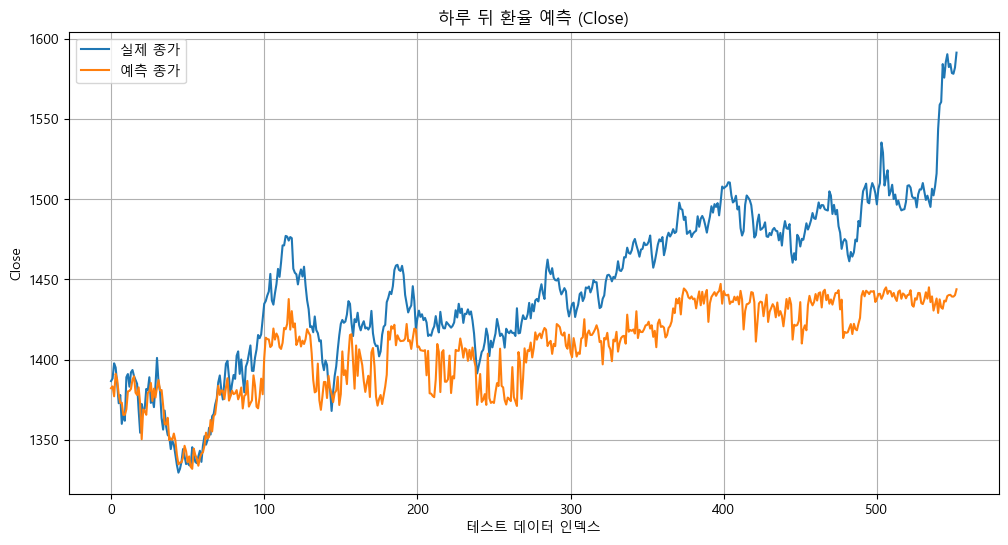

:막대_차트: 회귀 평가 지표:
MAE:  13.1288
RMSE: 20.2169
R²:   0.8331


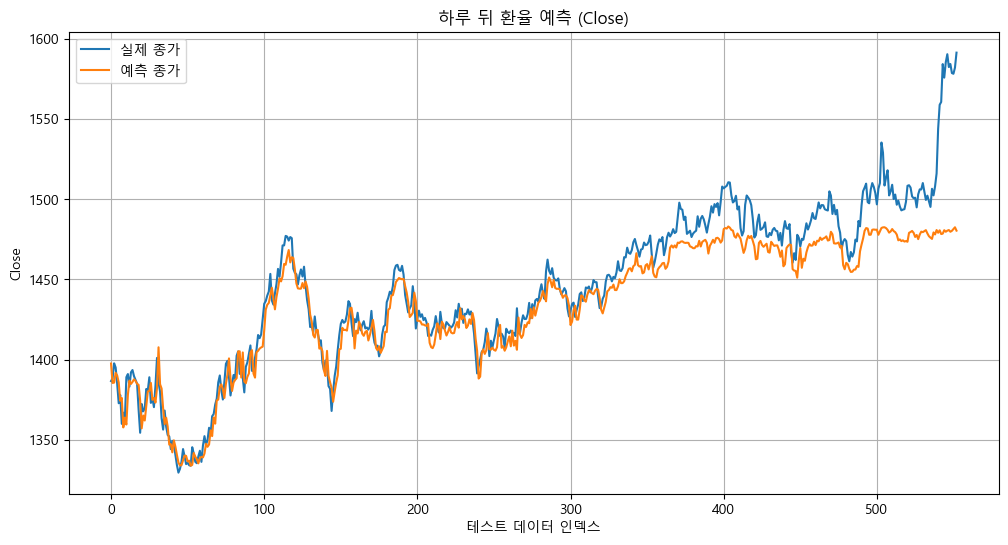

In [99]:
# -------------------------------
# 1. 라이브러리 불러오기
# -------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib.ticker as ticker

mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
# -------------------------------
# 2. 데이터 준비
# -------------------------------
df = df_base.copy()
df = df.sort_values('Date')  # 날짜 정렬
df['target'] = df['Close'].shift(-1)  # 하루 뒤 종가를 예측
# 결측치 제거
df = df.dropna()
# 날짜와 예측값 제거한 X, y 설정
X = df.drop(columns=['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change'], errors='ignore')
y = df['target'].values
# -------------------------------
# 3. 학습/테스트 데이터 분할
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)  # 시계열이라 셔플X

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# -------------------------------
# 4. 회귀 모델 학습
# -------------------------------
from xgboost import XGBRegressor
model1 = XGBRegressor(random_state=10)
model1.fit(X_train, y_train)

from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(random_state=10)
model2.fit(X_train, y_train)
# -------------------------------
# 5. 예측 및 평가
# -------------------------------
y_pred = model1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(":막대_차트: 회귀 평가 지표:")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

plt.figure(figsize=(12,6))
plt.plot(y_test, label='실제 종가')
plt.plot(y_pred, label='예측 종가')
plt.legend()
plt.title("하루 뒤 환율 예측 (Close)")
plt.xlabel("테스트 데이터 인덱스")
plt.ylabel("Close")
plt.grid(True)
plt.show()

y_pred = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(":막대_차트: 회귀 평가 지표:")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

plt.figure(figsize=(12,6))
plt.plot(y_test, label='실제 종가')
plt.plot(y_pred, label='예측 종가')
plt.legend()
plt.title("하루 뒤 환율 예측 (Close)")
plt.xlabel("테스트 데이터 인덱스")
plt.ylabel("Close")
plt.grid(True)
plt.show()

In [90]:
import joblib
model.save('best_lstm_model_up.h5')         # Keras 모델 저장
joblib.dump(scaler, 'scaler_up.pkl')        # Scaler 저장

['scaler_up.pkl']

C:\Users\campus4D044\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

📊 스태킹 앙상블 평가 지표:
MAE:  8.8606
RMSE: 14.4958
R²:   0.9133


C:\Users\campus4D044\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


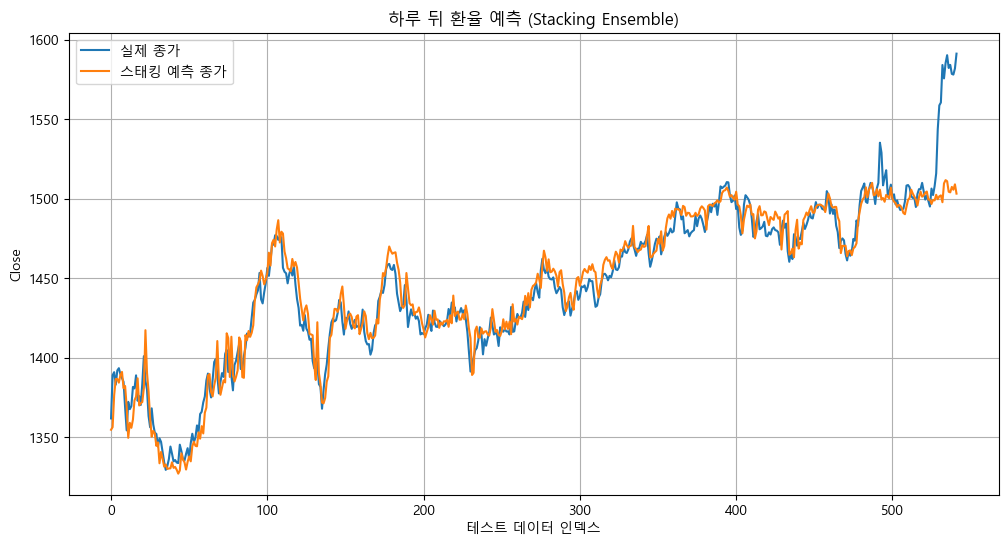


📊 XGBoost 단일 모델 성능 (참고):
MAE:  28.3881
RMSE: 36.3907
R²:   0.4600


C:\Users\campus4D044\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [91]:
# -------------------------------
# 1. 라이브러리 불러오기
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor

from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf
tf.random.set_seed(42)

# -------------------------------
# 2. 데이터 준비
# -------------------------------
df = df_base.copy()
df = df.sort_values('Date')  # 날짜 정렬
df['target'] = df['Close'].shift(-1)  # 하루 뒤 종가를 예측
df = df.dropna()

X = df.drop(columns=['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change'], errors='ignore')
y = df['target'].values

# -------------------------------
# 3. 학습/테스트 데이터 분할
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -------------------------------
# 4. LSTM용 시계열 데이터 구성
# -------------------------------
def create_sequences(X, y, seq_length=10):
    Xs, ys = [], []
    for i in range(len(X) - seq_length):
        Xs.append(X[i:i+seq_length])
        ys.append(y[i+seq_length])
    return np.array(Xs), np.array(ys)

seq_length = 10
X_lstm_train, y_lstm_train = create_sequences(X_train, y_train, seq_length)
X_lstm_test, y_lstm_test = create_sequences(X_test, y_test, seq_length)

# -------------------------------
# 5. LSTM 모델 정의 및 학습
# -------------------------------
def build_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = build_lstm((X_lstm_train.shape[1], X_lstm_train.shape[2]))
lstm_model.fit(X_lstm_train, y_lstm_train, epochs=20, batch_size=16, verbose=0)
pred_lstm = lstm_model.predict(X_lstm_test).flatten()

# -------------------------------
# 6. Random Forest 모델 학습
# -------------------------------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)[seq_length:]  # LSTM과 길이 맞춤

# -------------------------------
# 7. XGBoost 모델 학습 (기존 방식)
# -------------------------------
xgb = XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)[seq_length:]  # LSTM과 길이 맞춤

# -------------------------------
# 8. 스태킹 앙상블 (Meta 모델: Ridge)
# -------------------------------
meta_X = np.vstack([pred_rf, pred_xgb, pred_lstm]).T
meta_y = y_test[seq_length:]  # LSTM과 길이 맞춤

meta_model = Ridge()
meta_model.fit(meta_X, meta_y)
final_pred = meta_model.predict(meta_X)

# -------------------------------
# 9. 성능 평가 (스태킹)
# -------------------------------
print("\n📊 스태킹 앙상블 평가 지표:")
print(f"MAE:  {mean_absolute_error(meta_y, final_pred):.4f}")
print(f"RMSE: {mean_squared_error(meta_y, final_pred, squared=False):.4f}")
print(f"R²:   {r2_score(meta_y, final_pred):.4f}")

# -------------------------------
# 10. 예측 결과 시각화
# -------------------------------
plt.figure(figsize=(12,6))
plt.plot(meta_y, label='실제 종가')
plt.plot(final_pred, label='스태킹 예측 종가')
plt.legend()
plt.title("하루 뒤 환율 예측 (Stacking Ensemble)")
plt.xlabel("테스트 데이터 인덱스")
plt.ylabel("Close")
plt.grid(True)
plt.show()

# -------------------------------
# (Optional) 단일 XGBoost 성능도 같이 보기
# -------------------------------
print("\n📊 XGBoost 단일 모델 성능 (참고):")
raw_pred = xgb.predict(X_test)
print(f"MAE:  {mean_absolute_error(y_test, raw_pred):.4f}")
print(f"RMSE: {mean_squared_error(y_test, raw_pred, squared=False):.4f}")
print(f"R²:   {r2_score(y_test, raw_pred):.4f}")

In [92]:
df

,Date,WTI유_종가,WTI유_시가,WTI유_고가,WTI유_저가,WTI유_거래량,WTI유_변동%,금_종가,금_시가,금_고가,...,VSTOXX_저가,VSTOXX_변동%,EUROSTOXX50_종가,EUROSTOXX50_시가,EUROSTOXX50_고가,EUROSTOXX50_저가,EUROSTOXX50_변동%,유로지역(M1),유로지역(M2),target
44,2013-03-04,90.12,90.71,90.91,89.33,231110.0,-0.62,1572.4,1578.0,1584.3,...,21.34,-1.52,2619.78,2607.97,2628.67,2595.35,0.12,5173010,9079682,1416.73
45,2013-03-05,90.82,90.23,90.99,90.02,209870.0,0.78,1574.9,1574.2,1585.8,...,19.47,-8.82,2683.02,2635.34,2685.85,2635.34,2.41,5173010,9079682,1408.63
46,2013-03-06,90.43,90.83,91.17,89.55,244170.0,-0.43,1574.9,1574.9,1584.3,...,18.97,2.86,2679.89,2683.24,2704.01,2679.03,-0.12,5173010,9079682,1424.94
47,2013-03-07,91.56,90.42,91.73,90.22,234920.0,1.25,1575.1,1583.8,1584.9,...,18.68,-6.81,2690.85,2684.70,2700.84,2683.40,0.41,5173010,9079682,1415.68
48,2013-03-08,91.95,91.42,92.03,90.83,219960.0,0.43,1576.9,1577.4,1583.1,...,17.02,-7.26,2728.78,2699.30,2733.86,2699.30,1.41,5173010,9079682,1426.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,2025-03-21,68.28,68.35,68.65,67.65,198960.0,0.03,3048.4,3080.1,3082.2,...,19.10,3.62,5423.83,5435.76,5436.46,5393.30,-0.50,10684264,15658327,1584.34
3094,2025-03-24,69.11,68.35,69.33,67.95,247020.0,1.22,3044.0,3054.7,3066.4,...,18.54,-5.49,5415.79,5441.60,5470.23,5402.34,-0.15,10684264,15658327,1578.70
3095,2025-03-25,69.00,69.16,69.68,68.52,258410.0,-0.16,3039.6,3030.6,3055.4,...,17.58,-5.47,5475.08,5422.47,5496.73,5422.47,1.09,10684264,15658327,1578.25
3096,2025-03-26,69.65,69.16,70.22,69.06,262410.0,0.94,3037.3,3039.5,3049.7,...,17.72,8.12,5411.69,5479.68,5491.24,5407.52,-1.16,10684264,15658327,1582.11


C:\Users\campus4D044\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

🏆 Best Stacking Method: Meta_XGBoost_Extended
MAE:  5.1818
RMSE: 6.7169
R²:   0.9813


C:\Users\campus4D044\AppData\Local\Temp\ipykernel_3252\2375704983.py:144: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\campus4D044\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


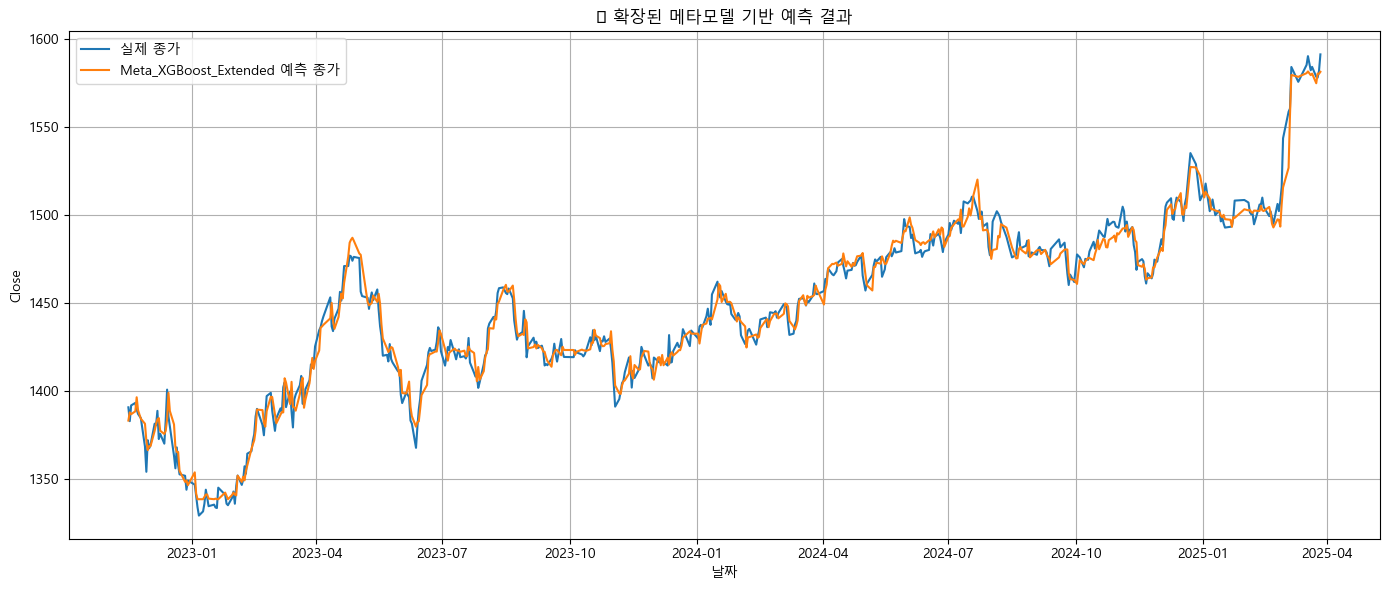

In [94]:
#실험: 메타모델 변경 + 가중평균(weighted average) 조합
#LinearRegression
#XGBRegressor
#Weighted Average (0.1 ~ 0.9) 조합
# 1. 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tqdm import tqdm

# 2. 데이터 준비
df = df_base.copy()
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df['target'] = df['Close'].shift(-1)
df = df.dropna().reset_index(drop=True)
drop_cols = ['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['target']

# 3. 시퀀스 구성 (LSTM용)
seq_len = 60
X_seq, y_seq = [], []
for i in range(len(X_scaled) - seq_len):
    X_seq.append(X_scaled[i:i+seq_len])
    y_seq.append(y_scaled[i+seq_len])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# 4. 학습/테스트 분할
split_idx = int(len(X_seq) * 0.8)
X_train_seq, X_test_seq = X_seq[:split_idx], X_seq[split_idx:]
y_train_seq, y_test_seq = y_seq[:split_idx], y_seq[split_idx:]
X_train_flat = X_scaled[seq_len:][ :split_idx]
X_test_flat  = X_scaled[seq_len:][ split_idx:]
y_train_flat = y_scaled[seq_len:][ :split_idx]
y_test_flat  = y_scaled[seq_len:][ split_idx:]

# 5. XGBoost 모델 학습
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train_flat, y_train_flat)
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 6. LSTM 모델 학습 (동일)
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(seq_len, X_seq.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=15, restore_best_weights=True)
model_lstm.fit(X_train_seq, y_train_seq,
               epochs=100,
               batch_size=32,
               validation_split=0.2,
               callbacks=[early_stop],
               verbose=0)
y_pred_lstm = scaler_y.inverse_transform(model_lstm.predict(X_test_seq)).reshape(-1)

# 🔥 NEW: 7. RandomForest 모델 추가
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train_flat, y_train_flat.ravel())
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 8. 실제값 준비
y_true = scaler_y.inverse_transform(y_test_seq).reshape(-1)

# 🔁 9. 다양한 메타 조합 실험
meta_results = []

# ① LinearRegression with extended features
X_meta = np.column_stack([
    y_pred_xgb,
    y_pred_lstm,
    y_pred_rf,
    y_pred_xgb - y_pred_lstm,
    y_pred_xgb / (y_pred_lstm + 1e-6),
    y_pred_xgb - y_pred_rf,
    y_pred_rf / (y_pred_lstm + 1e-6),
])

meta_lr = LinearRegression()
meta_lr.fit(X_meta, y_true)
y_pred_lr = meta_lr.predict(X_meta)
meta_results.append({
    'method': 'LinearRegression_Extended',
    'y_pred': y_pred_lr,
    'rmse': np.sqrt(mean_squared_error(y_true, y_pred_lr)),
    'mae': mean_absolute_error(y_true, y_pred_lr),
    'r2': r2_score(y_true, y_pred_lr)
})

# ② Meta XGBoost with extended features
meta_xgb = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=3)
meta_xgb.fit(X_meta, y_true)
y_pred_meta_xgb = meta_xgb.predict(X_meta)
meta_results.append({
    'method': 'Meta_XGBoost_Extended',
    'y_pred': y_pred_meta_xgb,
    'rmse': np.sqrt(mean_squared_error(y_true, y_pred_meta_xgb)),
    'mae': mean_absolute_error(y_true, y_pred_meta_xgb),
    'r2': r2_score(y_true, y_pred_meta_xgb)
})

# ③ Weighted average 조합 (XGB + LSTM만, 기존 유지)
for alpha in np.arange(0.0, 1.05, 0.1):
    y_pred_weighted = alpha * y_pred_xgb + (1 - alpha) * y_pred_lstm
    meta_results.append({
        'method': f'Weighted_α={alpha:.1f}',
        'y_pred': y_pred_weighted,
        'rmse': np.sqrt(mean_squared_error(y_true, y_pred_weighted)),
        'mae': mean_absolute_error(y_true, y_pred_weighted),
        'r2': r2_score(y_true, y_pred_weighted)
    })

# 📊 10. 결과 정리 및 최적 조합 출력
meta_results = sorted(meta_results, key=lambda x: x['rmse'])
best = meta_results[0]
print(f"\n🏆 Best Stacking Method: {best['method']}")
print(f"MAE:  {best['mae']:.4f}")
print(f"RMSE: {best['rmse']:.4f}")
print(f"R²:   {best['r2']:.4f}")

# 11. 시각화
date_test = df['Date'].iloc[seq_len + split_idx:].reset_index(drop=True)
n = min(len(date_test), len(y_true), len(best['y_pred']))
date_test = date_test[:n]
y_true = y_true[:n]
y_pred_final = best['y_pred'][:n]

plt.figure(figsize=(14,6))
plt.plot(date_test, y_true, label='실제 종가')
plt.plot(date_test, y_pred_final, label=f'{best["method"]} 예측 종가')
plt.title("📈 확장된 메타모델 기반 예측 결과")
plt.xlabel("날짜")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#실험: 메타모델 변경 + 가중평균(weighted average) 조합
#LinearRegression
#XGBRegressor
#Weighted Average (0.1 ~ 0.9) 조합
# 1. 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tqdm import tqdm

# 2. 데이터 준비
df = df_base.copy()
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df['target'] = df['Close'].shift(-1)
df = df.dropna().reset_index(drop=True)
drop_cols = ['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['target']
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# 3. 시퀀스 구성 (LSTM용)
seq_len = 60
X_seq, y_seq = [], []
for i in range(len(X_scaled) - seq_len):
    X_seq.append(X_scaled[i:i+seq_len])
    y_seq.append(y_scaled[i+seq_len])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# 4. 학습/테스트 분할
split_idx = int(len(X_seq) * 0.8)
X_train_seq, X_test_seq = X_seq[:split_idx], X_seq[split_idx:]
y_train_seq, y_test_seq = y_seq[:split_idx], y_seq[split_idx:]
X_train_flat = X_scaled[seq_len:][ :split_idx]
X_test_flat  = X_scaled[seq_len:][ split_idx:]
y_train_flat = y_scaled[seq_len:][ :split_idx]
y_test_flat  = y_scaled[seq_len:][ split_idx:]

# 5. XGBoost 모델 학습
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train_flat, y_train_flat)
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 6. LSTM 모델 학습 (동일)
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(seq_len, X_seq.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=15, restore_best_weights=True)
model_lstm.fit(X_train_seq, y_train_seq,
               epochs=100,
               batch_size=32,
               validation_split=0.2,
               callbacks=[early_stop],
               verbose=0)
y_pred_lstm = scaler_y.inverse_transform(model_lstm.predict(X_test_seq)).reshape(-1)

# 🔥 NEW: 7. RandomForest 모델 추가
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train_flat, y_train_flat.ravel())
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 8. 실제값 준비
y_true = scaler_y.inverse_transform(y_test_seq).reshape(-1)

# 🔁 9. 다양한 메타 조합 실험
meta_results = []

# ① LinearRegression with extended features
X_meta = np.column_stack([
    y_pred_xgb,
    y_pred_lstm,
    y_pred_rf,
    y_pred_xgb - y_pred_lstm,
    y_pred_xgb / (y_pred_lstm + 1e-6),
    y_pred_xgb - y_pred_rf,
    y_pred_rf / (y_pred_lstm + 1e-6),
])

meta_lr = LinearRegression()
meta_lr.fit(X_meta, y_true)
y_pred_lr = meta_lr.predict(X_meta)
meta_results.append({
    'method': 'LinearRegression_Extended',
    'y_pred': y_pred_lr,
    'rmse': np.sqrt(mean_squared_error(y_true, y_pred_lr)),
    'mae': mean_absolute_error(y_true, y_pred_lr),
    'r2': r2_score(y_true, y_pred_lr)
})

# ② Meta XGBoost with extended features
meta_xgb = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=3)
meta_xgb.fit(X_meta, y_true)
y_pred_meta_xgb = meta_xgb.predict(X_meta)
meta_results.append({
    'method': 'Meta_XGBoost_Extended',
    'y_pred': y_pred_meta_xgb,
    'rmse': np.sqrt(mean_squared_error(y_true, y_pred_meta_xgb)),
    'mae': mean_absolute_error(y_true, y_pred_meta_xgb),
    'r2': r2_score(y_true, y_pred_meta_xgb)
})

# ③ Weighted average 조합 (XGB + LSTM만, 기존 유지)
for alpha in np.arange(0.0, 1.05, 0.1):
    y_pred_weighted = alpha * y_pred_xgb + (1 - alpha) * y_pred_lstm
    meta_results.append({
        'method': f'Weighted_α={alpha:.1f}',
        'y_pred': y_pred_weighted,
        'rmse': np.sqrt(mean_squared_error(y_true, y_pred_weighted)),
        'mae': mean_absolute_error(y_true, y_pred_weighted),
        'r2': r2_score(y_true, y_pred_weighted)
    })

# 📊 10. 결과 정리 및 최적 조합 출력
meta_results = sorted(meta_results, key=lambda x: x['rmse'])
best = meta_results[0]
print(f"\n🏆 Best Stacking Method: {best['method']}")
print(f"MAE:  {best['mae']:.4f}")
print(f"RMSE: {best['rmse']:.4f}")
print(f"R²:   {best['r2']:.4f}")

# 11. 시각화
date_test = df['Date'].iloc[seq_len + split_idx:].reset_index(drop=True)
n = min(len(date_test), len(y_true), len(best['y_pred']))
date_test = date_test[:n]
y_true = y_true[:n]
y_pred_final = best['y_pred'][:n]

plt.figure(figsize=(14,6))
plt.plot(date_test, y_true, label='실제 종가')
plt.plot(date_test, y_pred_final, label=f'{best["method"]} 예측 종가')
plt.title("📈 확장된 메타모델 기반 예측 결과")
plt.xlabel("날짜")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [106]:
X.shape,X_meta.shape

((2762, 86), (543, 7))

In [52]:
pd.DataFrame({'Feature': X.columns,'Importance':model_rf.feature_importances_}).sort_values(by='Importance',ascending=False)

,Feature,Importance
96,VWAP,9.257335e-01
70,sma_5,3.806274e-02
34,주식수_외국인보유,4.642295e-03
152,adv40,2.010064e-03
138,adv180,1.708346e-03
...,...,...
182,유로지역(M1),4.260570e-06
162,alpha86,5.724184e-07
99,alpha12,3.646501e-07
163,alpha95,0.000000e+00


In [53]:
pd.DataFrame({'Feature': X.columns,'Importance':model_xgb.feature_importances_}).sort_values(by='Importance',ascending=False)

,Feature,Importance
140,adv60,0.439936
96,VWAP,0.317443
102,adv20,0.119629
70,sma_5,0.058005
72,sma_10,0.003871
...,...,...
119,returns,0.000000
153,adv81,0.000000
141,adv50,0.000000
142,adv15,0.000000


In [54]:
pd.DataFrame({'Importance':meta_xgb.feature_importances_}).sort_values(by='Importance',ascending=False)

,Importance
2,0.867274
6,0.046632
1,0.038920
0,0.036746
4,0.003710
3,0.003543
5,0.003175


C:\Users\campus4D044\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
🏆 Best Method: Meta_XGBoost_Extended
MAE:  2.3825
RMSE: 3.0851
R²:   0.9961


C:\Users\campus4D044\AppData\Local\Temp\ipykernel_22384\2707219629.py:146: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\campus4D044\AppData\Local\Temp\ipykernel_22384\2707219629.py:146: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\campus4D044\AppData\Local\Temp\ipykernel_22384\2707219629.py:146: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\campus4D044\AppData\Local\Temp\ipykernel_22384\2707219629.py:146: UserWarning: Glyph 47336 (\N{HANGUL SYLLABLE RU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\campus4D044\AppData\Local\Temp\ipykernel_22384\2707219629.py:146: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\campus4D044\AppData\Local\Temp\ipykernel_22384\2707219629.py:146: UserWarning: Glyph 5276

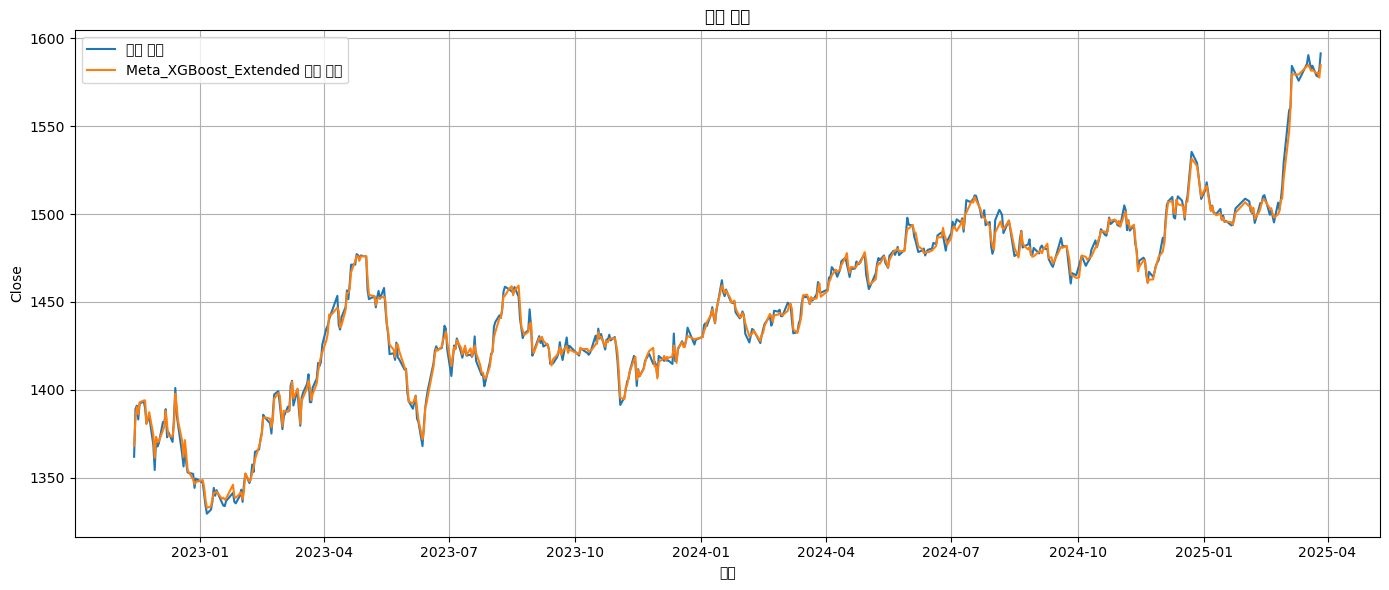

NameError: name 'joblib' is not defined

In [51]:
# 1. 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 2. 데이터 준비
df = df_base.copy()
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df['target'] = df['Close'].shift(-1)
df = df.dropna().reset_index(drop=True)

drop_cols = ['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change', 'Close', 'Open', 'High', 'Low']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['target'].values

# 3. 학습/테스트 분할
split_idx = int(len(df) * 0.8)
X_train_raw, X_test_raw = X.iloc[:split_idx], X.iloc[split_idx:]
y_train_raw, y_test_raw = y[:split_idx], y[split_idx:]

# 4. 정규화 (학습 데이터 기준)
scaler_X = MinMaxScaler().fit(X_train_raw)
X_train_scaled = scaler_X.transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

scaler_y = MinMaxScaler().fit(y_train_raw.reshape(-1, 1))
y_train_scaled = scaler_y.transform(y_train_raw.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

# 5. 시퀀스 생성 함수
def make_sequence(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

seq_len = 10
X_train_seq, y_train_seq = make_sequence(X_train_scaled, y_train_scaled, seq_len)
X_test_seq, y_test_seq = make_sequence(X_test_scaled, y_test_scaled, seq_len)

X_train_flat = X_train_scaled[seq_len:][:len(X_train_seq)]
X_test_flat  = X_test_scaled[seq_len:][:len(X_test_seq)]
y_train_flat = y_train_scaled[seq_len:][:len(X_train_seq)]
y_test_flat  = y_test_scaled[seq_len:][:len(X_test_seq)]

# 6. 모델 학습
## XGBoost
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train_flat, y_train_flat.ravel())
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

## LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(seq_len, X_train_seq.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=15, restore_best_weights=True)
model_lstm.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2,
               callbacks=[early_stop], verbose=0)
y_pred_lstm = scaler_y.inverse_transform(model_lstm.predict(X_test_seq)).reshape(-1)

## RandomForest
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train_flat, y_train_flat.ravel())
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 7. 실제값
y_true = scaler_y.inverse_transform(y_test_seq).reshape(-1)

# 8. 메타모델 + 가중 평균 조합
meta_results = []

# LinearRegression (확장 특성)
X_meta = np.column_stack([
    y_pred_xgb,
    y_pred_lstm,
    y_pred_rf,
    y_pred_xgb - y_pred_lstm,
    y_pred_xgb / (y_pred_lstm + 1e-6),
    y_pred_xgb - y_pred_rf,
    y_pred_rf / (y_pred_lstm + 1e-6),
])
meta_lr = LinearRegression().fit(X_meta, y_true)
y_pred_lr = meta_lr.predict(X_meta)
meta_results.append({
    'method': 'LinearRegression_Extended',
    'y_pred': y_pred_lr,
    'rmse': np.sqrt(mean_squared_error(y_true, y_pred_lr)),
    'mae': mean_absolute_error(y_true, y_pred_lr),
    'r2': r2_score(y_true, y_pred_lr)
})

# Meta XGBoost
meta_xgb = XGBRegressor(n_estimators=100, learning_rate=0.05)
meta_xgb.fit(X_meta, y_true)
y_pred_meta = meta_xgb.predict(X_meta)
meta_results.append({
    'method': 'Meta_XGBoost_Extended',
    'y_pred': y_pred_meta,
    'rmse': np.sqrt(mean_squared_error(y_true, y_pred_meta)),
    'mae': mean_absolute_error(y_true, y_pred_meta),
    'r2': r2_score(y_true, y_pred_meta)
})

# Weighted Average
for alpha in np.arange(0.0, 1.05, 0.1):
    y_pred_wa = alpha * y_pred_xgb + (1 - alpha) * y_pred_lstm
    meta_results.append({
        'method': f'Weighted_α={alpha:.1f}',
        'y_pred': y_pred_wa,
        'rmse': np.sqrt(mean_squared_error(y_true, y_pred_wa)),
        'mae': mean_absolute_error(y_true, y_pred_wa),
        'r2': r2_score(y_true, y_pred_wa)
    })

# 9. 결과 출력 및 시각화
meta_results = sorted(meta_results, key=lambda x: x['rmse'])
best = meta_results[0]

print(f"🏆 Best Method: {best['method']}")
print(f"MAE:  {best['mae']:.4f}")
print(f"RMSE: {best['rmse']:.4f}")
print(f"R²:   {best['r2']:.4f}")

# 10. 시각화
date_test = df['Date'].iloc[seq_len + split_idx:].reset_index(drop=True)
n = min(len(date_test), len(y_true), len(best['y_pred']))
plt.figure(figsize=(14,6))
plt.plot(date_test[:n], y_true[:n], label='실제 종가')
plt.plot(date_test[:n], best['y_pred'][:n], label=f'{best['method']} 예측 종가')
plt.title("하루 예측")
plt.xlabel("날짜")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import joblib
joblib.dump(meta_xgb, 'meta_xgb_model_up_하루.pkl')               # Meta XGB 저장
joblib.dump(scaler_X, 'scaler_X_up_하루.pkl')                     # X 스케일러 저장
joblib.dump(scaler_y, 'scaler_y_up_하루.pkl')                     # y 스케일러 저장

C:\Users\campus4D044\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
🏆 Best Method: Meta_XGBoost_Extended
MAE:  6.2993
RMSE: 8.4784
R²:   0.9701


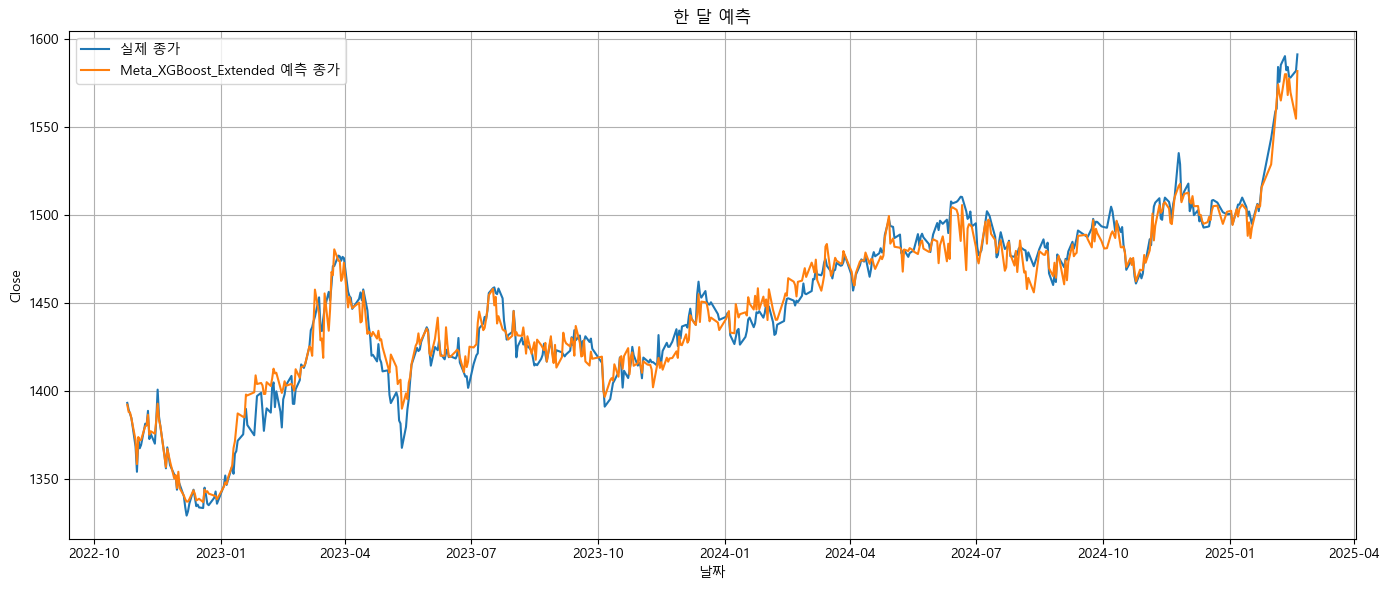

NameError: name 'joblib' is not defined

In [120]:
# 1. 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 2. 데이터 준비
df = df_base.copy()
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df['target'] = df['Close'].shift(-20)
df = df.dropna().reset_index(drop=True)

drop_cols = ['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change', 'Close', 'Open', 'High', 'Low']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['target'].values

# 3. 학습/테스트 분할
split_idx = int(len(df) * 0.8)
X_train_raw, X_test_raw = X.iloc[:split_idx], X.iloc[split_idx:]
y_train_raw, y_test_raw = y[:split_idx], y[split_idx:]

# 4. 정규화 (학습 데이터 기준)
scaler_X = MinMaxScaler().fit(X_train_raw)
X_train_scaled = scaler_X.transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

scaler_y = MinMaxScaler().fit(y_train_raw.reshape(-1, 1))
y_train_scaled = scaler_y.transform(y_train_raw.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

# 5. 시퀀스 생성 함수
def make_sequence(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

seq_len = 10
X_train_seq, y_train_seq = make_sequence(X_train_scaled, y_train_scaled, seq_len)
X_test_seq, y_test_seq = make_sequence(X_test_scaled, y_test_scaled, seq_len)

X_train_flat = X_train_scaled[seq_len:][:len(X_train_seq)]
X_test_flat  = X_test_scaled[seq_len:][:len(X_test_seq)]
y_train_flat = y_train_scaled[seq_len:][:len(X_train_seq)]
y_test_flat  = y_test_scaled[seq_len:][:len(X_test_seq)]

# 6. 모델 학습
## XGBoost
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train_flat, y_train_flat.ravel())
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

## LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(seq_len, X_train_seq.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=15, restore_best_weights=True)
model_lstm.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2,
               callbacks=[early_stop], verbose=0)
y_pred_lstm = scaler_y.inverse_transform(model_lstm.predict(X_test_seq)).reshape(-1)

## RandomForest
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train_flat, y_train_flat.ravel())
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 7. 실제값
y_true = scaler_y.inverse_transform(y_test_seq).reshape(-1)

# 8. 메타모델 + 가중 평균 조합
meta_results = []

# LinearRegression (확장 특성)
X_meta = np.column_stack([
    y_pred_xgb,
    y_pred_lstm,
    y_pred_rf,
    y_pred_xgb - y_pred_lstm,
    y_pred_xgb / (y_pred_lstm + 1e-6),
    y_pred_xgb - y_pred_rf,
    y_pred_rf / (y_pred_lstm + 1e-6),
])
meta_lr = LinearRegression().fit(X_meta, y_true)
y_pred_lr = meta_lr.predict(X_meta)
meta_results.append({
    'method': 'LinearRegression_Extended',
    'y_pred': y_pred_lr,
    'rmse': np.sqrt(mean_squared_error(y_true, y_pred_lr)),
    'mae': mean_absolute_error(y_true, y_pred_lr),
    'r2': r2_score(y_true, y_pred_lr)
})

# Meta XGBoost
meta_xgb = XGBRegressor(n_estimators=100, learning_rate=0.05)
meta_xgb.fit(X_meta, y_true)
y_pred_meta = meta_xgb.predict(X_meta)
meta_results.append({
    'method': 'Meta_XGBoost_Extended',
    'y_pred': y_pred_meta,
    'rmse': np.sqrt(mean_squared_error(y_true, y_pred_meta)),
    'mae': mean_absolute_error(y_true, y_pred_meta),
    'r2': r2_score(y_true, y_pred_meta)
})

# Weighted Average
for alpha in np.arange(0.0, 1.05, 0.1):
    y_pred_wa = alpha * y_pred_xgb + (1 - alpha) * y_pred_lstm
    meta_results.append({
        'method': f'Weighted_α={alpha:.1f}',
        'y_pred': y_pred_wa,
        'rmse': np.sqrt(mean_squared_error(y_true, y_pred_wa)),
        'mae': mean_absolute_error(y_true, y_pred_wa),
        'r2': r2_score(y_true, y_pred_wa)
    })

# 9. 결과 출력 및 시각화
meta_results = sorted(meta_results, key=lambda x: x['rmse'])
best = meta_results[0]

print(f"🏆 Best Method: {best['method']}")
print(f"MAE:  {best['mae']:.4f}")
print(f"RMSE: {best['rmse']:.4f}")
print(f"R²:   {best['r2']:.4f}")

# 10. 시각화
date_test = df['Date'].iloc[seq_len + split_idx:].reset_index(drop=True)
n = min(len(date_test), len(y_true), len(best['y_pred']))
plt.figure(figsize=(14,6))
plt.plot(date_test[:n], y_true[:n], label='실제 종가')
plt.plot(date_test[:n], best['y_pred'][:n], label=f'{best['method']} 예측 종가')
plt.title("한 달 예측")
plt.xlabel("날짜")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

joblib.dump(meta_xgb, 'meta_xgb_model_up_한달.pkl')               # Meta XGB 저장
joblib.dump(scaler_X, 'scaler_X_up_한달.pkl')                     # X 스케일러 저장
joblib.dump(scaler_y, 'scaler_y_up_한달.pkl')                     # y 스케일러 저장

C:\Users\campus4D044\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
🏆 Best Method: Meta_XGBoost_Extended
MAE:  8.1890
RMSE: 11.1733
R²:   0.9475


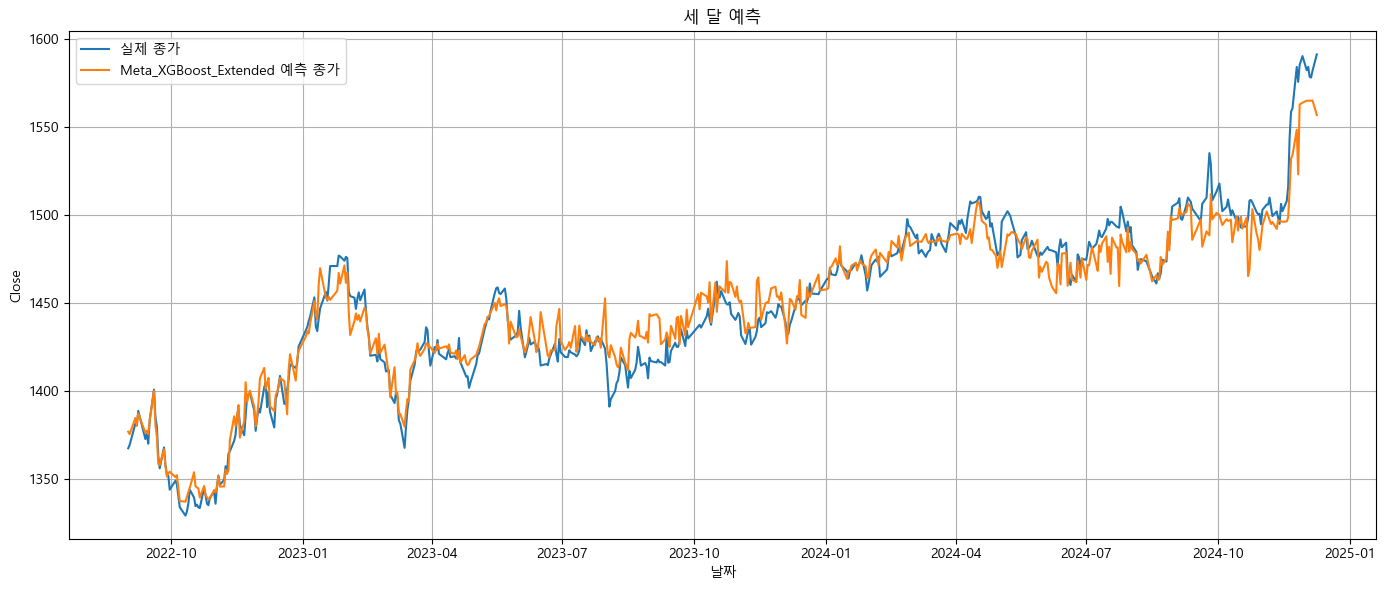

['scaler_y_up_세달.pkl']

In [116]:
# 1. 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 2. 데이터 준비
df = df_base.copy()
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df['target'] = df['Close'].shift(-60)
df = df.dropna().reset_index(drop=True)

drop_cols = ['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['target'].values

# 3. 학습/테스트 분할
split_idx = int(len(df) * 0.8)
X_train_raw, X_test_raw = X.iloc[:split_idx], X.iloc[split_idx:]
y_train_raw, y_test_raw = y[:split_idx], y[split_idx:]

# 4. 정규화 (학습 데이터 기준)
scaler_X = MinMaxScaler().fit(X_train_raw)
X_train_scaled = scaler_X.transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

scaler_y = MinMaxScaler().fit(y_train_raw.reshape(-1, 1))
y_train_scaled = scaler_y.transform(y_train_raw.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

# 5. 시퀀스 생성 함수
def make_sequence(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

seq_len = 10
X_train_seq, y_train_seq = make_sequence(X_train_scaled, y_train_scaled, seq_len)
X_test_seq, y_test_seq = make_sequence(X_test_scaled, y_test_scaled, seq_len)

X_train_flat = X_train_scaled[seq_len:][:len(X_train_seq)]
X_test_flat  = X_test_scaled[seq_len:][:len(X_test_seq)]
y_train_flat = y_train_scaled[seq_len:][:len(X_train_seq)]
y_test_flat  = y_test_scaled[seq_len:][:len(X_test_seq)]

# 6. 모델 학습
## XGBoost
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train_flat, y_train_flat.ravel())
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

## LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(seq_len, X_train_seq.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=15, restore_best_weights=True)
model_lstm.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2,
               callbacks=[early_stop], verbose=0)
y_pred_lstm = scaler_y.inverse_transform(model_lstm.predict(X_test_seq)).reshape(-1)

## RandomForest
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train_flat, y_train_flat.ravel())
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 7. 실제값
y_true = scaler_y.inverse_transform(y_test_seq).reshape(-1)

# 8. 메타모델 + 가중 평균 조합
meta_results = []

# LinearRegression (확장 특성)
X_meta = np.column_stack([
    y_pred_xgb,
    y_pred_lstm,
    y_pred_rf,
    y_pred_xgb - y_pred_lstm,
    y_pred_xgb / (y_pred_lstm + 1e-6),
    y_pred_xgb - y_pred_rf,
    y_pred_rf / (y_pred_lstm + 1e-6),
])
meta_lr = LinearRegression().fit(X_meta, y_true)
y_pred_lr = meta_lr.predict(X_meta)
meta_results.append({
    'method': 'LinearRegression_Extended',
    'y_pred': y_pred_lr,
    'rmse': np.sqrt(mean_squared_error(y_true, y_pred_lr)),
    'mae': mean_absolute_error(y_true, y_pred_lr),
    'r2': r2_score(y_true, y_pred_lr)
})

# Meta XGBoost
meta_xgb = XGBRegressor(n_estimators=100, learning_rate=0.05)
meta_xgb.fit(X_meta, y_true)
y_pred_meta = meta_xgb.predict(X_meta)
meta_results.append({
    'method': 'Meta_XGBoost_Extended',
    'y_pred': y_pred_meta,
    'rmse': np.sqrt(mean_squared_error(y_true, y_pred_meta)),
    'mae': mean_absolute_error(y_true, y_pred_meta),
    'r2': r2_score(y_true, y_pred_meta)
})

# Weighted Average
for alpha in np.arange(0.0, 1.05, 0.1):
    y_pred_wa = alpha * y_pred_xgb + (1 - alpha) * y_pred_lstm
    meta_results.append({
        'method': f'Weighted_α={alpha:.1f}',
        'y_pred': y_pred_wa,
        'rmse': np.sqrt(mean_squared_error(y_true, y_pred_wa)),
        'mae': mean_absolute_error(y_true, y_pred_wa),
        'r2': r2_score(y_true, y_pred_wa)
    })

# 9. 결과 출력 및 시각화
meta_results = sorted(meta_results, key=lambda x: x['rmse'])
best = meta_results[0]

print(f"🏆 Best Method: {best['method']}")
print(f"MAE:  {best['mae']:.4f}")
print(f"RMSE: {best['rmse']:.4f}")
print(f"R²:   {best['r2']:.4f}")

# 10. 시각화
date_test = df['Date'].iloc[seq_len + split_idx:].reset_index(drop=True)
n = min(len(date_test), len(y_true), len(best['y_pred']))
plt.figure(figsize=(14,6))
plt.plot(date_test[:n], y_true[:n], label='실제 종가')
plt.plot(date_test[:n], best['y_pred'][:n], label=f'{best['method']} 예측 종가')
plt.title("세 달 예측")
plt.xlabel("날짜")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

joblib.dump(meta_xgb, 'meta_xgb_model_up_세달.pkl')               # Meta XGB 저장
joblib.dump(scaler_X, 'scaler_X_up_세달.pkl')                     # X 스케일러 저장
joblib.dump(scaler_y, 'scaler_y_up_세달.pkl')                     # y 스케일러 저장

C:\Users\campus4D044\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
🏆 Best Method: Meta_XGBoost_Extended
MAE:  10.0354
RMSE: 14.3202
R²:   0.9048


C:\Users\campus4D044\AppData\Local\Temp\ipykernel_22384\1442333016.py:146: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\campus4D044\AppData\Local\Temp\ipykernel_22384\1442333016.py:146: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\campus4D044\AppData\Local\Temp\ipykernel_22384\1442333016.py:146: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\campus4D044\AppData\Local\Temp\ipykernel_22384\1442333016.py:146: UserWarning: Glyph 45804 (\N{HANGUL SYLLABLE DAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\campus4D044\AppData\Local\Temp\ipykernel_22384\1442333016.py:146: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\campus4D044\AppData\Local\Temp\ipykernel_22384\1442333016.py:146: UserWarning: Glyph 527

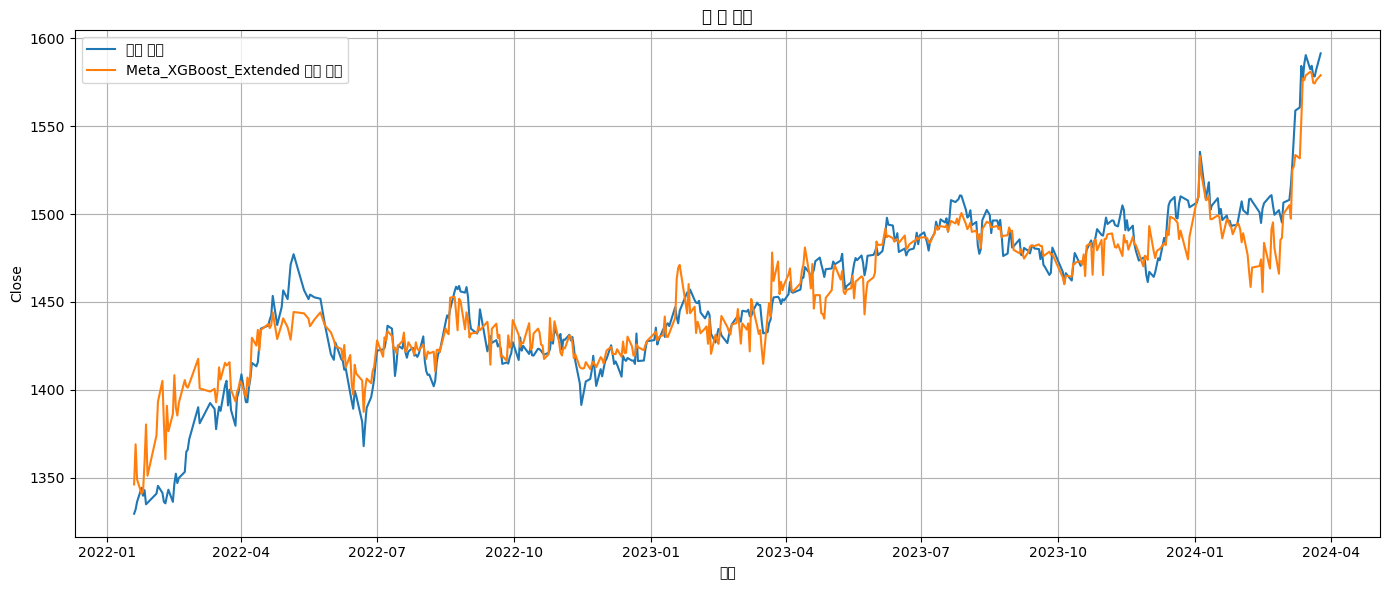

NameError: name 'joblib' is not defined

In [55]:
# 1. 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 2. 데이터 준비
df = df_base.copy()
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df['target'] = df['Close'].shift(-250)
df = df.dropna().reset_index(drop=True)

drop_cols = ['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['target'].values

# 3. 학습/테스트 분할
split_idx = int(len(df) * 0.8)
X_train_raw, X_test_raw = X.iloc[:split_idx], X.iloc[split_idx:]
y_train_raw, y_test_raw = y[:split_idx], y[split_idx:]

# 4. 정규화 (학습 데이터 기준)
scaler_X = MinMaxScaler().fit(X_train_raw)
X_train_scaled = scaler_X.transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

scaler_y = MinMaxScaler().fit(y_train_raw.reshape(-1, 1))
y_train_scaled = scaler_y.transform(y_train_raw.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

# 5. 시퀀스 생성 함수
def make_sequence(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

seq_len = 10
X_train_seq, y_train_seq = make_sequence(X_train_scaled, y_train_scaled, seq_len)
X_test_seq, y_test_seq = make_sequence(X_test_scaled, y_test_scaled, seq_len)

X_train_flat = X_train_scaled[seq_len:][:len(X_train_seq)]
X_test_flat  = X_test_scaled[seq_len:][:len(X_test_seq)]
y_train_flat = y_train_scaled[seq_len:][:len(X_train_seq)]
y_test_flat  = y_test_scaled[seq_len:][:len(X_test_seq)]

# 6. 모델 학습
## XGBoost
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train_flat, y_train_flat.ravel())
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

## LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(seq_len, X_train_seq.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=15, restore_best_weights=True)
model_lstm.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2,
               callbacks=[early_stop], verbose=0)
y_pred_lstm = scaler_y.inverse_transform(model_lstm.predict(X_test_seq)).reshape(-1)

## RandomForest
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train_flat, y_train_flat.ravel())
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 7. 실제값
y_true = scaler_y.inverse_transform(y_test_seq).reshape(-1)

# 8. 메타모델 + 가중 평균 조합
meta_results = []

# LinearRegression (확장 특성)
X_meta = np.column_stack([
    y_pred_xgb,
    y_pred_lstm,
    y_pred_rf,
    y_pred_xgb - y_pred_lstm,
    y_pred_xgb / (y_pred_lstm + 1e-6),
    y_pred_xgb - y_pred_rf,
    y_pred_rf / (y_pred_lstm + 1e-6),
])
meta_lr = LinearRegression().fit(X_meta, y_true)
y_pred_lr = meta_lr.predict(X_meta)
meta_results.append({
    'method': 'LinearRegression_Extended',
    'y_pred': y_pred_lr,
    'rmse': np.sqrt(mean_squared_error(y_true, y_pred_lr)),
    'mae': mean_absolute_error(y_true, y_pred_lr),
    'r2': r2_score(y_true, y_pred_lr)
})

# Meta XGBoost
meta_xgb = XGBRegressor(n_estimators=100, learning_rate=0.05)
meta_xgb.fit(X_meta, y_true)
y_pred_meta = meta_xgb.predict(X_meta)
meta_results.append({
    'method': 'Meta_XGBoost_Extended',
    'y_pred': y_pred_meta,
    'rmse': np.sqrt(mean_squared_error(y_true, y_pred_meta)),
    'mae': mean_absolute_error(y_true, y_pred_meta),
    'r2': r2_score(y_true, y_pred_meta)
})

# Weighted Average
for alpha in np.arange(0.0, 1.05, 0.1):
    y_pred_wa = alpha * y_pred_xgb + (1 - alpha) * y_pred_lstm
    meta_results.append({
        'method': f'Weighted_α={alpha:.1f}',
        'y_pred': y_pred_wa,
        'rmse': np.sqrt(mean_squared_error(y_true, y_pred_wa)),
        'mae': mean_absolute_error(y_true, y_pred_wa),
        'r2': r2_score(y_true, y_pred_wa)
    })

# 9. 결과 출력 및 시각화
meta_results = sorted(meta_results, key=lambda x: x['rmse'])
best = meta_results[0]

print(f"🏆 Best Method: {best['method']}")
print(f"MAE:  {best['mae']:.4f}")
print(f"RMSE: {best['rmse']:.4f}")
print(f"R²:   {best['r2']:.4f}")

# 10. 시각화
date_test = df['Date'].iloc[seq_len + split_idx:].reset_index(drop=True)
n = min(len(date_test), len(y_true), len(best['y_pred']))
plt.figure(figsize=(14,6))
plt.plot(date_test[:n], y_true[:n], label='실제 종가')
plt.plot(date_test[:n], best['y_pred'][:n], label=f'{best['method']} 예측 종가')
plt.title("일 년 예측")
plt.xlabel("날짜")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

joblib.dump(meta_xgb, 'meta_xgb_model_up_일년.pkl')               # Meta XGB 저장
joblib.dump(scaler_X, 'scaler_X_up_일년.pkl')                     # X 스케일러 저장
joblib.dump(scaler_y, 'scaler_y_up_일년.pkl')                     # y 스케일러 저장